In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Create the "Academic performance" dataset
data = {
    'StudentID': range(101, 116),
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Other'],
    'Math_Score': [85, 78, 92, 65, 88, 76, 95, 82, 70, 90, 68, 89, 77, 93, 80],
    'Science_Score': [79, 85, 88, 72, 91, 80, 93, 86, 75, 92, 70, 87, 81, 90, 83],
    'English_Score': [82, 79, 90, 68, 85, 77, 92, 84, 73, 88, np.nan, 86, 78, 91, 81],
    'Study_Hours': [5, 6, 7, 4, 8, 5, 9, 6, 3, 7, 4, 8, 5, 9, 6],
    'Attendance': ['High', 'High', 'High', 'Low', 'High', 'Medium', 'High', 'High', 'Low', 'High', 'Low', 'High', 'Medium', 'High', 'Medium']
}

df = pd.DataFrame(data)

In [7]:
print("Original Dataset:")
print(df)
print("\n" + "="*50 + "\n")

Original Dataset:
    StudentID  Gender  Math_Score  Science_Score  English_Score  Study_Hours  \
0         101    Male          85             79           82.0            5   
1         102  Female          78             85           79.0            6   
2         103    Male          92             88           90.0            7   
3         104  Female          65             72           68.0            4   
4         105    Male          88             91           85.0            8   
5         106  Female          76             80           77.0            5   
6         107    Male          95             93           92.0            9   
7         108  Female          82             86           84.0            6   
8         109    Male          70             75           73.0            3   
9         110  Female          90             92           88.0            7   
10        111    Male          68             70            NaN            4   
11        112  Female 

In [8]:
print("Missing Values before handling:")
print(df.isnull().sum())
print("\n")

Missing Values before handling:
StudentID        0
Gender           0
Math_Score       0
Science_Score    0
English_Score    1
Study_Hours      0
Attendance       0
dtype: int64




In [9]:
print("Value counts for categorical variables before handling:")
for col in ['Gender', 'Attendance']:
    print(f"{col}:\n{df[col].value_counts()}\n")

Value counts for categorical variables before handling:
Gender:
Gender
Male      7
Female    7
Other     1
Name: count, dtype: int64

Attendance:
Attendance
High      9
Low       3
Medium    3
Name: count, dtype: int64



In [10]:
# Handle missing values (simplest method: imputation with mean for numeric, mode for categorical)
df['English_Score'].fillna(df['English_Score'].mean(), inplace=True)
df['Gender'].replace('Other', df['Gender'].mode()[0], inplace=True) # Replace 'Other' with the most frequent gender

<ipython-input-10-33d04a2b3623>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['English_Score'].fillna(df['English_Score'].mean(), inplace=True)
<ipython-input-10-33d04a2b3623>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [11]:
print("Missing Values after handling:")
print(df.isnull().sum())
print("\n")

Missing Values after handling:
StudentID        0
Gender           0
Math_Score       0
Science_Score    0
English_Score    0
Study_Hours      0
Attendance       0
dtype: int64




In [14]:
print("Value counts for categorical variables after handling:")
for col in ['Gender', 'Attendance']:
    print(f"{col}:\n{df[col].value_counts()}\n")

print("\n" + "="*50 + "\n")

Value counts for categorical variables after handling:
Gender:
Gender
Female    8
Male      7
Name: count, dtype: int64

Attendance:
Attendance
High      9
Low       3
Medium    3
Name: count, dtype: int64





In [15]:
numeric_cols = ['Math_Score', 'Science_Score', 'English_Score', 'Study_Hours']

Boxplots of numeric variables before outlier handling:


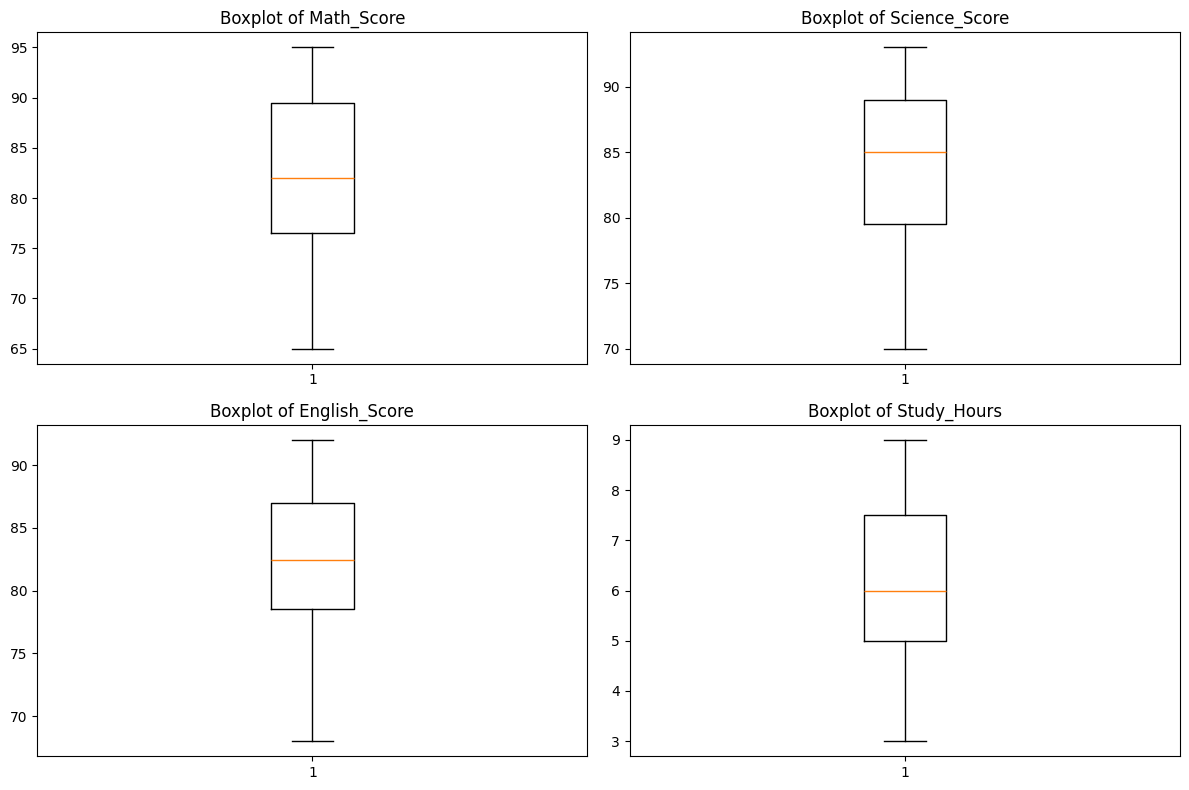

In [16]:
print("Boxplots of numeric variables before outlier handling:")
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()
print("\n")

In [17]:
def identify_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

In [18]:
print("Outliers in numeric variables before handling:")
for col in numeric_cols:
    outliers = identify_outliers_iqr(df[col])
    if not outliers.empty:
        print(f"Outliers in {col}:\n{outliers}\n")
    else:
        print(f"No outliers found in {col}\n")

Outliers in numeric variables before handling:
No outliers found in Math_Score

No outliers found in Science_Score

No outliers found in English_Score

No outliers found in Study_Hours



In [19]:
def cap_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    capped_series = series.copy()
    capped_series[capped_series < lower_bound] = Q1
    capped_series[capped_series > upper_bound] = Q3
    return capped_series

In [20]:
for col in numeric_cols:
    df[col] = cap_outliers_iqr(df[col])

In [21]:
print("\nOutliers in numeric variables after handling (using capping):")
for col in numeric_cols:
    outliers = identify_outliers_iqr(df[col])
    if not outliers.empty:
        print(f"Outliers in {col}:\n{outliers}\n")
    else:
        print(f"No outliers found in {col}\n")


Outliers in numeric variables after handling (using capping):
No outliers found in Math_Score

No outliers found in Science_Score

No outliers found in English_Score

No outliers found in Study_Hours




Boxplots of numeric variables after outlier handling:


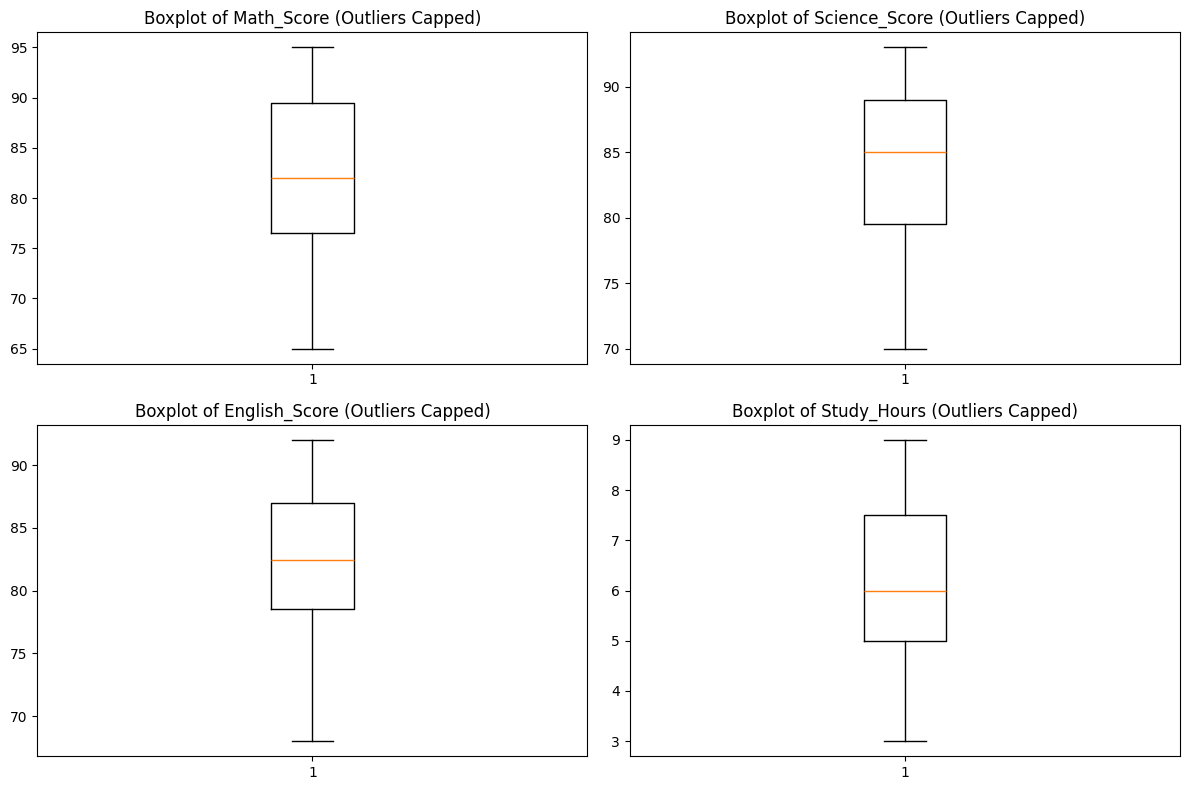

In [23]:
print("\nBoxplots of numeric variables after outlier handling:")
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col} (Outliers Capped)')
plt.tight_layout()
plt.show()

print("\n" + "="*50 + "\n")


Distribution of Study_Hours before transformation:
0.08995105288792901


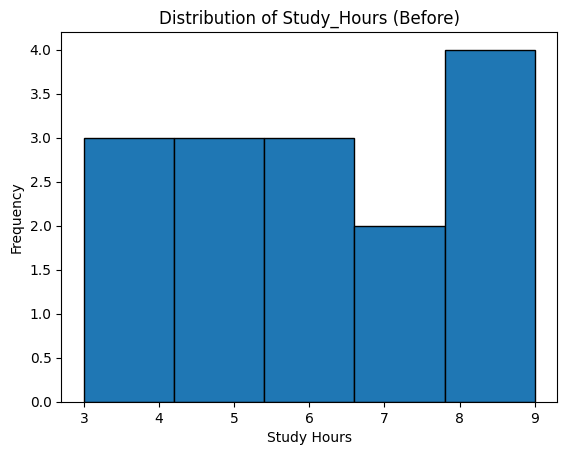

In [24]:
print("Distribution of Study_Hours before transformation:")
print(df['Study_Hours'].skew())
plt.hist(df['Study_Hours'], bins=5, edgecolor='black')
plt.title('Distribution of Study_Hours (Before)')
plt.xlabel('Study Hours')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Apply a square root transformation to potentially reduce right skewness (if any)
df['Study_Hours_Transformed'] = np.sqrt(df['Study_Hours'])


In [26]:
print("\nDistribution of Study_Hours after square root transformation:")
print(df['Study_Hours_Transformed'].skew())


Distribution of Study_Hours after square root transformation:
-0.18015600442368662


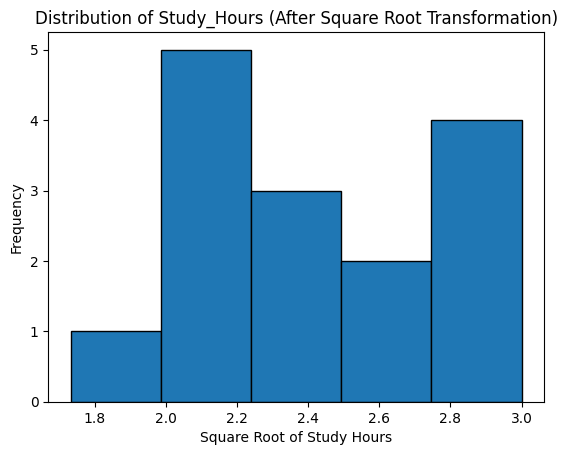

In [27]:
plt.hist(df['Study_Hours_Transformed'], bins=5, edgecolor='black')
plt.title('Distribution of Study_Hours (After Square Root Transformation)')
plt.xlabel('Square Root of Study Hours')
plt.ylabel('Frequency')
plt.show()

In [28]:
print("\nTransformed Dataset:")
print(df)


Transformed Dataset:
    StudentID  Gender  Math_Score  Science_Score  English_Score  Study_Hours  \
0         101    Male          85             79      82.000000            5   
1         102  Female          78             85      79.000000            6   
2         103    Male          92             88      90.000000            7   
3         104  Female          65             72      68.000000            4   
4         105    Male          88             91      85.000000            8   
5         106  Female          76             80      77.000000            5   
6         107    Male          95             93      92.000000            9   
7         108  Female          82             86      84.000000            6   
8         109    Male          70             75      73.000000            3   
9         110  Female          90             92      88.000000            7   
10        111    Male          68             70      82.428571            4   
11        112  Fem